In [4]:
from pointpattern import PointPattern
from point import Point
import pysal as ps

shapefile = ps.open(ps.examples.get_path('new_haven_merged.shp'))
dbf = ps.open(ps.examples.get_path('new_haven_merged.dbf'))

points = []

for geometry, attributes in zip(shapefile, dbf):
    points.append(Point(geometry[0], geometry[1], mark=attributes[1]))

i = 0


for point in points:
    i += 1
    #Print the first five of the points
    if i < 5:
        print("{0}, {1}, {2}".format(point.x, point.y, point.mark))
    else:
        break
    

-72.976512, 41.337662, all-cases-dead-on-arrival
-72.960621, 41.326316, animal-bites
-72.896278, 41.324366, animal-bites
-72.952039, 41.325584, animal-bites


In [6]:
pattern = PointPattern()

for point in points:
    pattern.add_point(point)

#It prints the mark attribute... not sure why recieving error below
#for point in pattern.points:
    #print(point.mark)

nn = pattern.average_nearest_neighbor_distance_kdtree()
print("The overall nearest neighbor distance of the data set is: " + str(nn))



The overall nearest neighbor distance of the data set is: 0.000120180676464


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


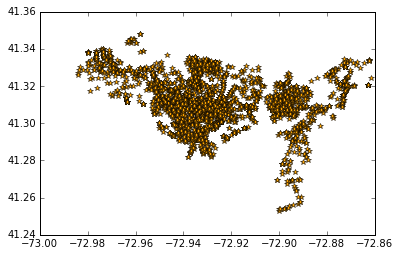

In [9]:
%pylab inline

def plot_points(x, y, **kwargs):
    plot(x,y, **kwargs)
    
x = []
y = []

for point in points:
    x.append(point.x)
    y.append(point.y)

plot_points(x, y, color='orange', marker='*', linewidth=0)

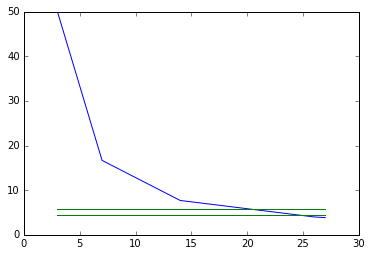

In [18]:
gx = [3, 7, 14, 26, 27]
gy = []

for step in gx:
    gy.append(pattern.compute_g(step))
    
lower, upper = pattern.critical_points()

plot(gx, gy)
plot((3, 27), (lower, lower), color='green')
plot((3, 27), (upper, upper), color='green')